In [20]:
%matplotlib inline
from cvxopt import matrix, solvers
from scipy.optimize import minimize
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [21]:
expect = np.array((.12, .10, .07, .03))
cov = np.array(((.0064, .0008, -.0011, 0), (.0008, .0025, 0, 0),\
                 (-.0011, 0, .0004, 0), (0, 0, 0, 0)))
G = -np.identity(expect.size)
h = np.zeros(expect.shape)
A = np.ones(expect.shape)
b = 1
n = expect.size
dims = {'l': G.shape[0], 'q': [], 's': []}


mu = 10 ** np.r_[0:7:200j]

# print('Expected value is \n' + str(expect))
# print('covariance is \n' + str(cov))
# print('G is \n' + str(G))

In [22]:
G.shape

(4, 4)

In [23]:
# CVXOPT solver (coneqp)
solvers.options['show_progress'] = False
x_star = lambda mu: solvers.coneqp(matrix(2 * mu * cov, tc= 'd'),\
        matrix(-expect, tc = 'd'),\
        matrix(G, tc = 'd').T, matrix(h, tc = 'd'), dims,\
        matrix(A, tc = 'd').T, matrix(b, tc = 'd'))['x']

In [24]:
x_opt = np.squeeze(np.array([np.array(x_star(i)) for i in mu])).T

In [25]:
e_vs_mu = np.dot(x_opt.T, expect)
std_vs_mu = np.diag(np.sqrt(np.dot(x_opt.T, np.dot(cov, x_opt))))

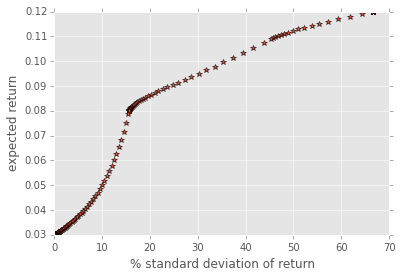

In [26]:
_ = plt.plot((std_vs_mu/ e_vs_mu) * 100, e_vs_mu, '*')
_ = plt.xlabel('% standard deviation of return')
_ = plt.ylabel('expected return')

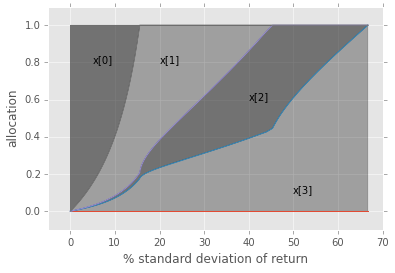

In [27]:
fig = plt.figure()
ax = plt.gca()

alpha = [0.3,0.5, 0.3, 0.5]
textloc = [(5,0.8), (20,0.8), (40,0.6), (50,0.1)]

for i in range(x_opt.shape[0]):
    _ = plt.plot((std_vs_mu/ e_vs_mu) * 100, 1 - sum(x_opt[i:,:]))
    _ = plt.fill_between((std_vs_mu/ e_vs_mu) * 100, 1 - sum(x_opt[i:,:]),\
                         1 - sum(x_opt[i+1:,:]),\
                         alpha = alpha[i], color = 'k')
    _ = ax.text(textloc[i][0], textloc[i][1], 'x[' + str(i) +']')

_ = plt.xlabel('% standard deviation of return')
_ = plt.ylabel('allocation')
_ = plt.ylim(-.1, 1.1)
_ = plt.xlim(-5, 70)


In [33]:
# part b
eta = 10 ** np.r_[-1:-8:100j]
c_cov = sp.linalg.sqrtm(cov)

Matrix is singular and may not have a square root.


In [34]:
def p10b(eta, toPrint = False):
    """Constrain probibility of loss to be less than eta"""
    phi_inv = np.sqrt(2) * sp.special.erfinv(2 * eta - 1)
    G0 = -np.identity(expect.size)
    h0 = np.zeros(expect.size)
    G1 = np.vstack((-expect, phi_inv * c_cov))
    h1 = np.zeros(G1.shape[0])
    c = - expect
    A = np.ones(expect.shape)
    b = 1
    
    if toPrint:
        print('c is: ' + str(c))
        print('G0 is:\n' + str(G0))
        print('h0 is:\n' + str(np.array(h0, ndmin = 2).T))
        print('G1 is:\n' + str(G1))
        print('h1 is:\n' + str(np.array(h1, ndmin = 2).T))
        print('A is :\n' + str(np.array(A, ndmin = 2)))
        print('b is :\n' + str(b))
    xOpt = solvers.socp(matrix(c, tc = 'd'), 
                        matrix(G0, tc = 'd'),matrix(h0, tc = 'd'),\
                        [matrix(G1, tc = 'd')],[matrix(h1, tc = 'd')],\
                         matrix(A, tc = 'd').T, matrix(b, tc = 'd'))['x']
    return xOpt

In [35]:
x_opt = np.squeeze(np.array([np.array(p10b(e)) for e in eta])).T

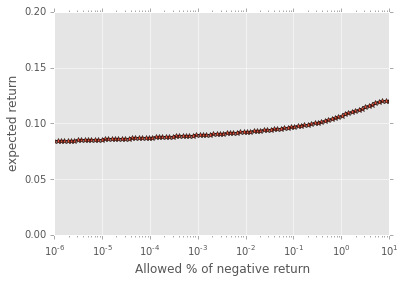

In [36]:
_ = plt.plot(100 * eta, np.dot(expect, x_opt), '*')
_ = plt.xlabel('Allowed % of negative return')
_ = plt.ylabel('expected return')
_ = plt.ylim(0,0.2)
_ = plt.semilogx()

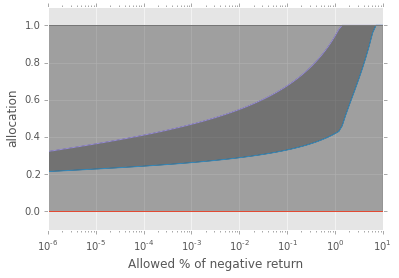

In [38]:
fig = plt.figure()
ax = plt.gca()

alpha = [0.3,0.5, 0.3, 0.5]
# textloc = [(5,0.8), (20,0.8), (40,0.6), (50,0.1)]

for i in range(x_opt.shape[0]):
    _ = plt.plot(100 * eta, 1 - sum(x_opt[i:,:]))
    _ = plt.fill_between(100 * eta, 1 - sum(x_opt[i:,:]),\
                         1 - sum(x_opt[i+1:,:]),\
                         alpha = alpha[i], color = 'k')
#     _ = ax.text(textloc[i][0], textloc[i][1], 'x[' + str(i) +']')

_ = plt.xlabel('Allowed % of negative return')
_ = plt.ylabel('allocation')
_ = plt.ylim(-.1, 1.1)
# _ = plt.xlim(-5, 70)
_ = plt.semilogx()